# Project Week 2

Emiel Steegh   - s1846388  
Freek Nijweide - s1857746

# Project Description

Description etc etc

In [34]:
# The following includes are needed to work with graphs and display solutions.
from __future__ import division
import networkx as nx
from IPython.core.display import display
from _dbus_bindings import Dictionary
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import utils
import graphs

import pandas as pd

plt.rcParams["figure.figsize"] = [12,8]

print("imports done")

imports done


## Assignment 1

text

## Assignment 2

text

## Assignment 3

In [ ]:
# code

## Assignment 4

There are three different ranking systems discussed in this week's chapters and lectures.
The first is an inDegree-based ranking system. The ranking of a page depends on how many pages link to it.
This system is easily fooled, and dead-end pages receive incredibly high rankings.

The second ranking system discussed is Google's PageRank. This system expands upon the idea of inDegree rankings,
by having a node "spread" its incoming ranking over its outgoing links. This can also include a degree of randomness,
where a node will spread some of its incoming ranking over *all* nods (to avoid spider traps and dead ends).

The third ranking system discussed HITS, based on the hub-authority model. In this model, a page is considered a good hub
if it links to good authorities (pages with good content that people want to see). A page is considered a good
authority if it is linked to by proper hubs. The page's authority ranking is the one actually used in the search.


# write equations
# implementeer ze
# leg code uit
# leg resultaten uit

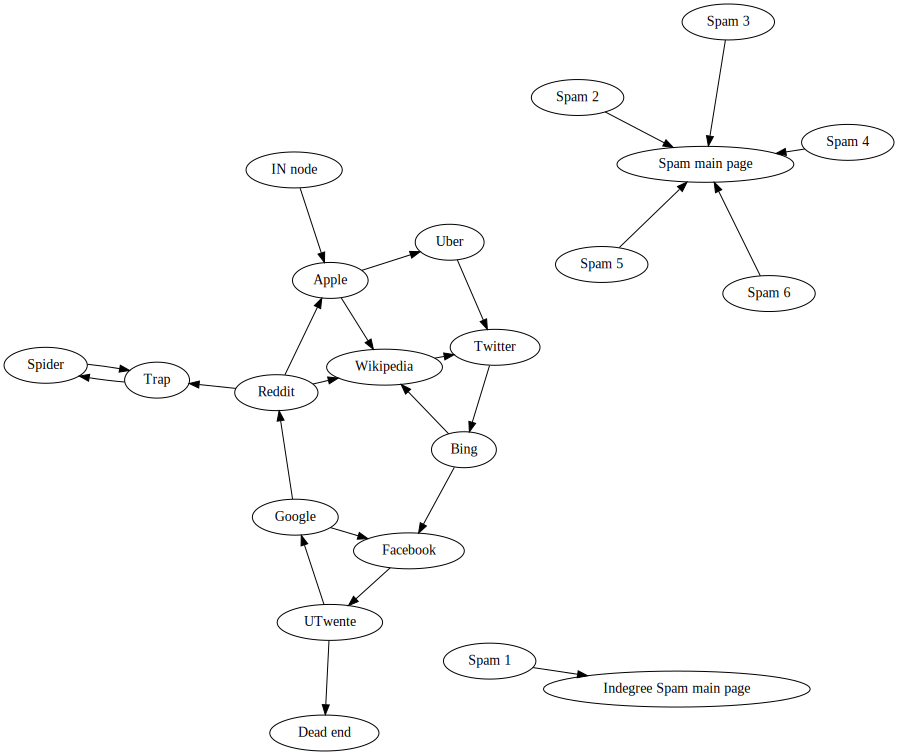

In [23]:
# Generate a graph we will use in the next exercise
graph = nx.DiGraph()

graph.add_edge('Google', 'Facebook')
graph.add_edge('Facebook', 'UTwente')
graph.add_edge('UTwente', 'Google')
graph.add_edge('Google', 'Reddit')
graph.add_edge('Reddit', 'Trap')
graph.add_edge('Spider','Trap')
graph.add_edge('Trap','Spider')
graph.add_edge('Reddit', 'Apple')
graph.add_edge('Reddit', 'Wikipedia')
graph.add_edge('Apple', 'Uber')
graph.add_edge('Uber', 'Twitter')
graph.add_edge('Twitter', 'Bing')
graph.add_edge('Wikipedia', 'Twitter')
graph.add_edge('Bing', 'Wikipedia')
graph.add_edge('Apple', 'Wikipedia')
graph.add_edge('Bing','Facebook')
graph.add_edge('UTwente','Dead end')
graph.add_edge('IN node','Apple')
graph.add_edge('Spam 1', 'Indegree Spam main page')
graph.add_edge('Spam 2', 'Spam main page')
graph.add_edge('Spam 3', 'Spam main page')
graph.add_edge('Spam 4', 'Spam main page')
graph.add_edge('Spam 5', 'Spam main page')
graph.add_edge('Spam 6', 'Spam main page')
display(utils.draw(graph))


# g.view()

In [ ]:
def generate_list_from_dict(graph, data):
    #type: (nx.Graph, bool) -> list
    return graph.nodes(data=data)

def generate_M_and_v(graph):
    #type: (nx.DiGraph) -> any
    M = nx.to_numpy_matrix(graph) #type: np.matrix
    M.transpose()
    M_T = M.transpose()
    v = list(graph.nodes)
    return M,v

def generate_indegree_score(graph):    
    in_degrees = []
    for node in graph.nodes:
        if type(graph) == nx.classes.digraph.DiGraph:
            in_degrees.append(graph.in_degree(node))
        else:
            in_degrees.append(graph.degree(node))
    return in_degrees
    
def order_nodes_by_rank(nodes, rank):    
    order = np.argsort(rank)[::-1] #sort in degrees in descending order, return indices
    sorted_nodes = [nodes[i] for i in order]
    return sorted_nodes

def hits(M):
    v=[1]*len(M)
    unchanged = True
    h=np.array(v)
    a=np.array(v)
    while unchanged:
        #calculate new v for hub and authority
        # M remains unchanged
        previous_a = np.copy(a)
        previous_h = np.copy(h)
        
        a = np.array(np.dot(M.transpose(),h)).flatten()
        a /= a.max()

        h = np.array(np.dot(M,a)).flatten()
        h /= h.max()
        unchanged = np.average(a-previous_a) < 0.01  #TODO unhardcode this
    
    return a,h

M,v = generate_M_and_v(graph)
print v
in_degrees = generate_indegree_score(graph)
print(M)
print(v)
print "Solution to in_degree ranking for graph below:"
print order_nodes_by_rank(v, in_degrees)

print hits(M)
